In [1]:
import pandas as pd
import pandas.core.frame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tools.kyoulee_tools import *


In [2]:
df_ori = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df = df_ori
df.shape

(7043, 20)

In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
show_unique(df)

🚀 unique values
gender [2]{object} : ['Female', 'Male']
SeniorCitizen [2]{int64} : [0, 1]
Partner [2]{object} : ['No', 'Yes']
Dependents [2]{object} : ['No', 'Yes']
tenure [73]{int64} : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
PhoneService [2]{object} : ['No', 'Yes']
MultipleLines [3]{object} : ['No', 'No phone service', 'Yes']
InternetService [3]{object} : ['DSL', 'Fiber optic', 'No']
OnlineSecurity [3]{object} : ['No', 'No internet service', 'Yes']
OnlineBackup [3]{object} : ['No', 'No internet service', 'Yes']
DeviceProtection [3]{object} : ['No', 'No internet service', 'Yes']
TechSupport [3]{object} : ['No', 'No internet service', 'Yes']
StreamingTV [3]{object} : ['No', 'No internet service', 'Yes']
StreamingMovies [3]{object} : ['No', 'No inte

In [4]:
data_check_null(df)
data_check_object(df)
df = df.dropna()

🚀 NULL Check
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Total : 11
🚀 '' Check
OK


In [5]:
data_check_null(df)
data_check_object(df)

🚀 NULL Check
OK
🚀 '' Check
OK


In [6]:
df["MonthlyCharges_0_30"] = ((0 <= df["MonthlyCharges"]) & (df["MonthlyCharges"] < 30))
df["MonthlyCharges_30_70"] = ((30 <= df["MonthlyCharges"]) & (df["MonthlyCharges"] < 70))
df["MonthlyCharges_70_99"] = ((70 <= df["MonthlyCharges"]) & (df["MonthlyCharges"] < 99))
df["MonthlyCharges_99_00"] = (99 <= df["MonthlyCharges"])

/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/450810019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MonthlyCharges_0_30"] = ((0 <= df["MonthlyCharges"]) & (df["MonthlyCharges"] < 30))
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/450810019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MonthlyCharges_30_70"] = ((30 <= df["MonthlyCharges"]) & (df["MonthlyCharges"] < 70))
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/450810019.py:4:

In [7]:
print(df[["MonthlyCharges_0_30", "MonthlyCharges_30_70", "MonthlyCharges_70_99", "MonthlyCharges_99_00"]].sum())
print(df[["MonthlyCharges_0_30", "MonthlyCharges_30_70", "MonthlyCharges_70_99", "MonthlyCharges_99_00"]].sum().sum())
print(df.shape)

MonthlyCharges_0_30     1647
MonthlyCharges_30_70    1796
MonthlyCharges_70_99    2565
MonthlyCharges_99_00    1024
dtype: int64
7032
(7032, 24)


In [8]:
df["MonthlyCharges_group"] = df["MonthlyCharges_0_30"].replace(
    {True: "0-30", False: np.nan}
)
df["MonthlyCharges_group"] = np.where(
    df["MonthlyCharges_30_70"] == True, "30-70", df["MonthlyCharges_group"]
)
df["MonthlyCharges_group"] = np.where(
    df["MonthlyCharges_70_99"] == True, "70-99", df["MonthlyCharges_group"]
)
df["MonthlyCharges_group"] = np.where(
    df["MonthlyCharges_99_00"] == True, "99plus", df["MonthlyCharges_group"]
)
print(df["MonthlyCharges_group"].isnull().sum())
df["MonthlyCharges_group"]

0


/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/4091510087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MonthlyCharges_group"] = df["MonthlyCharges_0_30"].replace(
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/4091510087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MonthlyCharges_group"] = np.where(
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/4091510087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

customerID
7590-VHVEG      0-30
5575-GNVDE     30-70
3668-QPYBK     30-70
7795-CFOCW     30-70
9237-HQITU     70-99
               ...  
6840-RESVB     70-99
2234-XADUH    99plus
4801-JZAZL      0-30
8361-LTMKD     70-99
3186-AJIEK    99plus
Name: MonthlyCharges_group, Length: 7032, dtype: object

/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/39921667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="MonthlyCharges_group", ax=axes[1], palette=sns.xkcd_palette(colors))


<Axes: xlabel='MonthlyCharges_group', ylabel='count'>

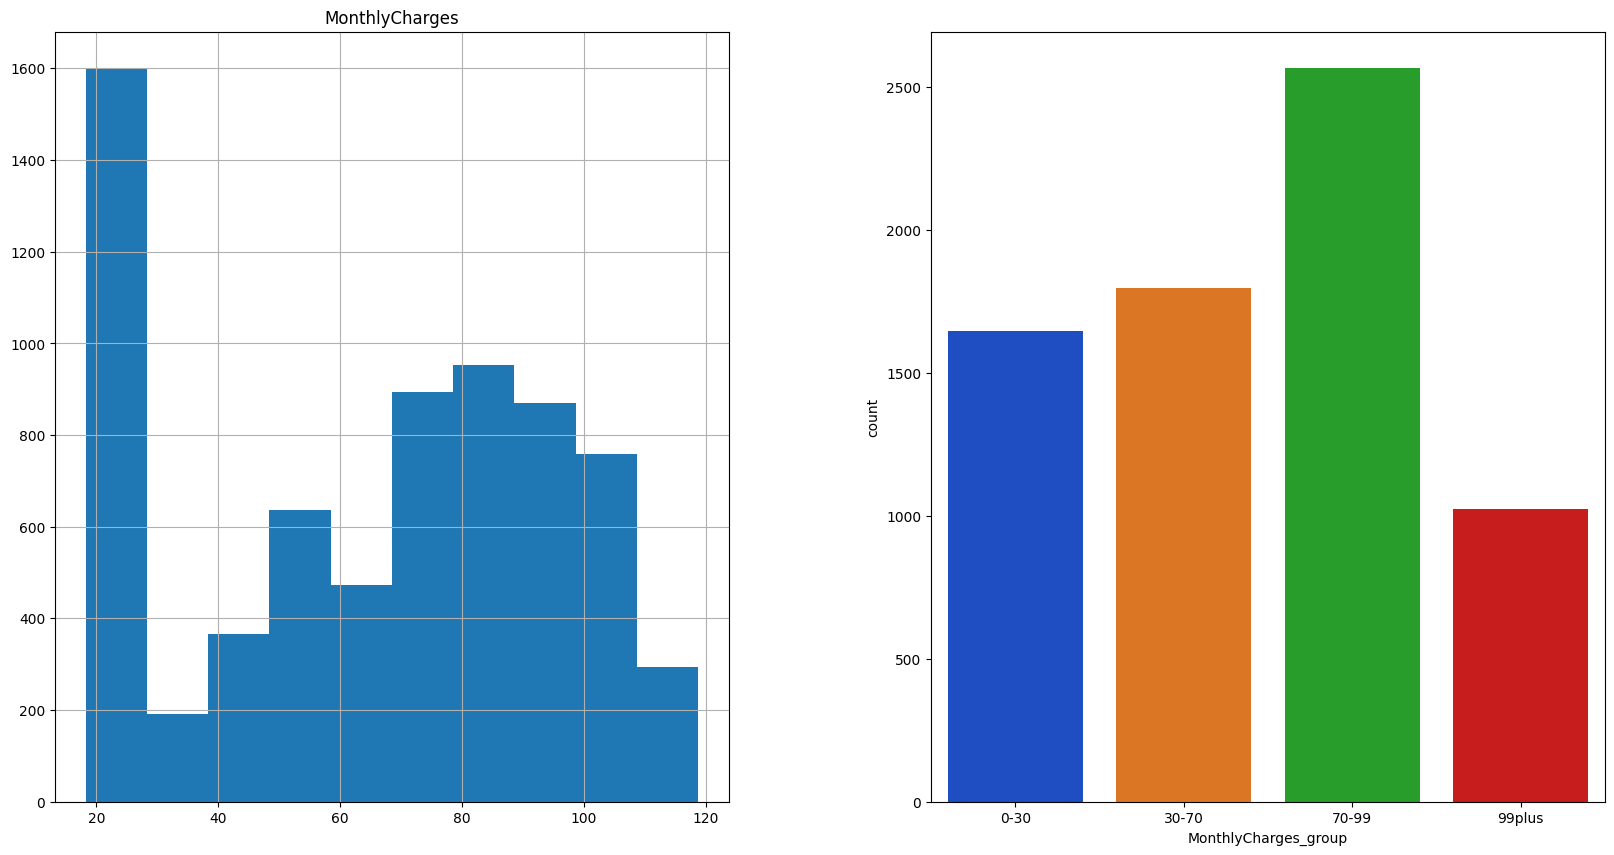

In [9]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(20,10))

df.hist("MonthlyCharges", ax=axes[0])

colors = ["blue", "orange", "green", "red"]

sns.countplot(data=df, x="MonthlyCharges_group", ax=axes[1], palette=sns.xkcd_palette(colors))


In [10]:
feature_names = df.columns.tolist()
feature_names.remove("gender")

In [11]:
show_unique(df)

🚀 unique values
gender [2]{object} : ['Female', 'Male']
SeniorCitizen [2]{int64} : [0, 1]
Partner [2]{object} : ['No', 'Yes']
Dependents [2]{object} : ['No', 'Yes']
tenure [72]{int64} : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
PhoneService [2]{object} : ['No', 'Yes']
MultipleLines [3]{object} : ['No', 'No phone service', 'Yes']
InternetService [3]{object} : ['DSL', 'Fiber optic', 'No']
OnlineSecurity [3]{object} : ['No', 'No internet service', 'Yes']
OnlineBackup [3]{object} : ['No', 'No internet service', 'Yes']
DeviceProtection [3]{object} : ['No', 'No internet service', 'Yes']
TechSupport [3]{object} : ['No', 'No internet service', 'Yes']
StreamingTV [3]{object} : ['No', 'No internet service', 'Yes']
StreamingMovies [3]{object} : ['No', 'No interne

In [12]:
colum = [
    "SeniorCitizen",
    "tenure",
    "TotalCharges",
    "gender_Female",
    "gender_Male",
    "Partner_No",
    "Partner_Yes",
    "Dependents_No",
    "Dependents_Yes",
    "PhoneService_No",
]
df["gender_Female"] = (df["gender"] == "Female").astype(int)
df["gender_Male"] = (df["gender"] == "Male").astype(int)
df["Partner_Yes"] = (df["Partner"] == "Yes").astype(int)
df["Partner_No"] = (df["Partner"] == "No").astype(int)
df["Dependents_Yes"] = (df["Dependents"] == "Yes").astype(int)
df["Dependents_No"] = (df["Dependents"] == "No").astype(int)
df["PhoneService_No"] = (df["PhoneService"] == "No").astype(int)
df[colum].head()

/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/2856010046.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender_Female"] = (df["gender"] == "Female").astype(int)
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/2856010046.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender_Male"] = (df["gender"] == "Male").astype(int)
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_14821/2856010046.py:15: SettingWithCopyWarning: 
A value is trying to be set 

,SeniorCitizen,tenure,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No
customerID,,,,,,,,,,
7590-VHVEG,0,1,29.85,1,0,0,1,1,0,1
5575-GNVDE,0,34,1889.50,0,1,1,0,1,0,0
3668-QPYBK,0,2,108.15,0,1,1,0,1,0,0
7795-CFOCW,0,45,1840.75,0,1,1,0,1,0,1
9237-HQITU,0,2,151.65,1,0,1,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[colum]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict) * 100

69.22530206112296

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()

scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)

pd.DataFrame(X_scaled_train).describe()

X_scaled_test = scaler.transform(X_test)
pd.DataFrame(X_scaled_test).describe()

model = LogisticRegression()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
print(model.score(X_scaled_train, y_train))

pred_test = model.predict(X_scaled_test)
print(model.score(X_scaled_test, y_test))



0.7736888888888889
0.7611940298507462
